### General definition of Euler-Maruyama method

Consider the stochastic differential equation:

$$
\mathrm{d} X_t=a\left(X_t, t\right) \mathrm{d} t+b\left(X_t, t\right) \mathrm{d} W_t
$$

with initial condition $X_0=x_0$, where $W_t$ denotes the Wiener process, and suppose that we wish to solve this SDE on some interval of time $[0,T]$. Then the Euler-Maruyama approximation to the true solution $X$ is the Markov chain $Y$ defined as follows:
- Partition the interval $[0, T]$ into $N$ equal subintervals of width $\Delta t>0$ :

$$
0=\tau_0<\tau_1<\cdots<\tau_N=T \text { and } \Delta t=T / N
$$

- Set $Y_0=x_0$
- Recursively define $Y_n$ for $0 \leq n \leq N-1$ by

$$
Y_{n+1}=Y_n+a\left(Y_n, \tau_n\right) \Delta t+b\left(Y_n, \tau_n\right) \Delta W_n
$$

where

$$
\Delta W_n=W_{\tau_{n+1}}-W_{\tau_n}
$$


The random variables $\Delta W_n$ are independent and identically distributed normal random variables with expected value zero and variance $\Delta t$.

The following Python code implements the Euler-Maruyama method and uses it to solve the Ornstein-Uhlenbeck process defined by

$$
\begin{aligned}
& d Y_t=\theta \cdot\left(\mu-Y_t\right) \mathrm{d} t+\sigma \mathrm{d} W_t \\
& Y_0=Y_{\text {init }}
\end{aligned}
$$


The random numbers for $\mathrm{d} W_t$ are generated using the NumPy mathematics package.

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


class Model:
    """Stochastic model constants."""
    THETA = 0.7
    MU = 1.5
    SIGMA = 0.06


def mu(y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck mu."""
    return Model.THETA * (Model.MU - y)


def sigma(_y: float, _t: float) -> float:
    """Implement the Ornstein–Uhlenbeck sigma."""
    return Model.SIGMA


def dW(delta_t: float) -> float:
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))


def run_simulation():
    """ Return the result of one full simulation."""
    T_INIT = 3
    T_END = 7
    N = 1000  # Compute at 1000 grid points
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * DT + sigma(y, t) * dW(DT)

    return TS, ys

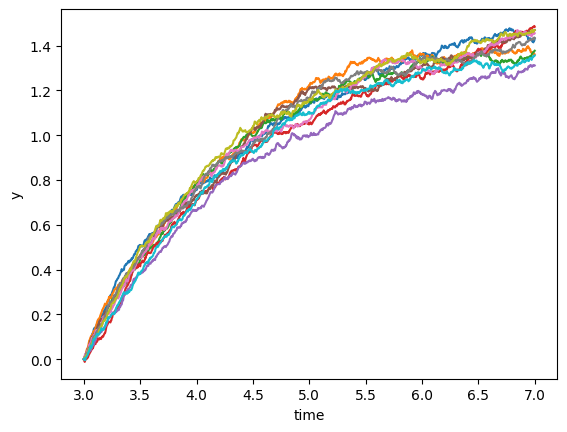

In [9]:
def plot_simulations(num_sims: int):
    """ Plot several simulations in one image."""
    for _ in range(num_sims):
        # The * operator unpacks the tuple returned by run_simulation
        plt.plot(*run_simulation())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()


if __name__ == "__main__":
    NUM_SIMS = 10
    plot_simulations(NUM_SIMS)

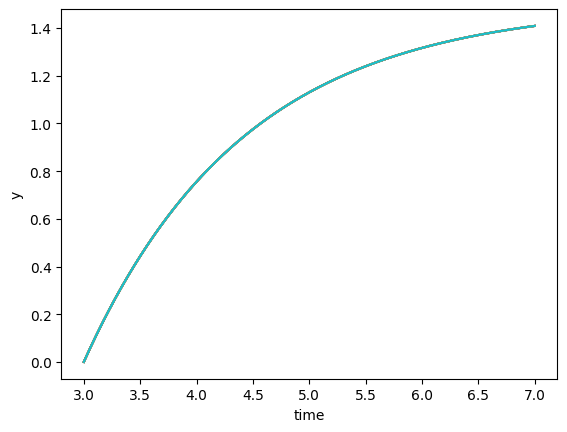

In [8]:
def run_simulation_deterministic():
    """ Return the result of one full simulation."""
    T_INIT = 3
    T_END = 7
    N = 1000  # Compute at 1000 grid points
    DT = float(T_END - T_INIT) / N
    TS = np.arange(T_INIT, T_END + DT, DT)
    assert TS.size == N + 1

    Y_INIT = 0

    ys = np.zeros(TS.size)
    ys[0] = Y_INIT
    for i in range(1, TS.size):
        t = T_INIT + (i - 1) * DT
        y = ys[i - 1]
        ys[i] = y + mu(y, t) * DT

    return TS, ys


def plot_simulations(num_sims: int):
    """ Plot several simulations in one image."""
    for _ in range(num_sims):
        # The * operator unpacks the tuple returned by run_simulation
        plt.plot(*run_simulation_deterministic())

    plt.xlabel("time")
    plt.ylabel("y")
    plt.show()


if __name__ == "__main__":
    NUM_SIMS = 10
    plot_simulations(NUM_SIMS)